In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/data .csv')

In [ ]:
data.head()

,Provinsi,Tahun,Tingkat Kemiskinan,Tingkat Pengangguran,Rasio Gini,Index Pertumbuhan Manusia,Laju Pertumbuhan Ekonomi
0,Aceh,2013,17.60,8.34,0.331,68.30,3.04
1,Sumatera Utara,2013,10.06,6.09,0.328,68.36,5.67
2,Sumatera Barat,2013,8.14,6.39,0.351,68.91,7.02
3,Riau,2013,7.72,4.19,0.393,69.91,1.05
4,Jambi,2013,8.07,2.89,0.327,67.76,6.39


In [ ]:
data

,Provinsi,Tahun,Tingkat Kemiskinan,Tingkat Pengangguran,Rasio Gini,Index Pertumbuhan Manusia,Laju Pertumbuhan Ekonomi
0,Aceh,2013,17.60,8.34,0.331,68.30,3.04
1,Sumatera Utara,2013,10.06,6.09,0.328,68.36,5.67
2,Sumatera Barat,2013,8.14,6.39,0.351,68.91,7.02
3,Riau,2013,7.72,4.19,0.393,69.91,1.05
4,Jambi,2013,8.07,2.89,0.327,67.76,6.39
...,...,...,...,...,...,...,...
301,Sulawesi Barat,2021,11.85,3.13,0.366,66.36,2.56
302,Maluku,2021,16.30,6.93,0.316,69.71,3.04
303,Maluku Utara,2021,6.38,4.71,0.278,68.76,16.40
304,Papua Barat,2021,21.82,5.84,0.374,65.26,-0.51


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   306 non-null    object 
 1   Tahun                      306 non-null    int64  
 2   Tingkat Kemiskinan         306 non-null    float64
 3   Tingkat Pengangguran       306 non-null    float64
 4   Rasio Gini                 306 non-null    float64
 5   Index Pertumbuhan Manusia  306 non-null    float64
 6   Laju Pertumbuhan Ekonomi   306 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 16.9+ KB


In [ ]:
df = data

In [ ]:
print(data.columns.tolist())

['Provinsi', 'Tahun', 'Tingkat Kemiskinan', 'Tingkat Pengangguran', 'Rasio Gini', 'Index Pertumbuhan Manusia', 'Laju Pertumbuhan Ekonomi']


In [ ]:
data.dtypes

Provinsi                      object
Tahun                          int64
Tingkat Kemiskinan           float64
Tingkat Pengangguran         float64
Rasio Gini                   float64
Index Pertumbuhan Manusia    float64
Laju Pertumbuhan Ekonomi     float64
dtype: object

In [ ]:
df = data
df.isnull().sum()

Provinsi                     0
Tahun                        0
Tingkat Kemiskinan           0
Tingkat Pengangguran         0
Rasio Gini                   0
Index Pertumbuhan Manusia    0
Laju Pertumbuhan Ekonomi     0
dtype: int64

In [ ]:
df[['Provinsi', 'Tahun']] = df[['Provinsi', 'Tahun']].astype('category')
df.dtypes

Provinsi                     category
Tahun                        category
Tingkat Kemiskinan            float64
Tingkat Pengangguran          float64
Rasio Gini                    float64
Index Pertumbuhan Manusia     float64
Laju Pertumbuhan Ekonomi      float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.Provinsi.drop_duplicates())
df.Provinsi = label.transform(df.Provinsi)
label.fit(df.Tahun.drop_duplicates())
df.Tahun = label.transform(df.Tahun)

In [ ]:
df.dtypes

Provinsi                       int64
Tahun                          int64
Tingkat Kemiskinan           float64
Tingkat Pengangguran         float64
Rasio Gini                   float64
Index Pertumbuhan Manusia    float64
Laju Pertumbuhan Ekonomi     float64
dtype: object

In [ ]:
df

,Provinsi,Tahun,Tingkat Kemiskinan,Tingkat Pengangguran,Rasio Gini,Index Pertumbuhan Manusia,Laju Pertumbuhan Ekonomi
0,0,0,17.60,8.34,0.331,68.30,3.04
1,32,0,10.06,6.09,0.328,68.36,5.67
2,30,0,8.14,6.39,0.351,68.91,7.02
3,24,0,7.72,4.19,0.393,69.91,1.05
4,7,0,8.07,2.89,0.327,67.76,6.39
...,...,...,...,...,...,...,...
301,25,8,11.85,3.13,0.366,66.36,2.56
302,18,8,16.30,6.93,0.316,69.71,3.04
303,19,8,6.38,4.71,0.278,68.76,16.40
304,23,8,21.82,5.84,0.374,65.26,-0.51


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
data = df

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
num_vars = ['Provinsi','Tahun','Tingkat Kemiskinan','Tingkat Pengangguran'	,'Rasio Gini',	'Index Pertumbuhan Manusia']values.reshape(-1,1)

In [ ]:
df_train.head()

,Provinsi,Tahun,Tingkat Kemiskinan,Tingkat Pengangguran,Rasio Gini,Index Pertumbuhan Manusia,Laju Pertumbuhan Ekonomi
159,0.454545,0.500,0.231931,0.521695,0.681917,0.546661,6.61
250,0.272727,0.875,0.380341,0.653885,0.782135,0.628319,-2.65
241,0.727273,0.875,0.226148,0.637740,0.699346,0.662108,-1.13
29,0.757576,0.000,0.395117,0.203835,0.705882,0.212389,9.38
292,0.393939,1.000,0.165757,0.457114,0.697168,0.603379,3.40


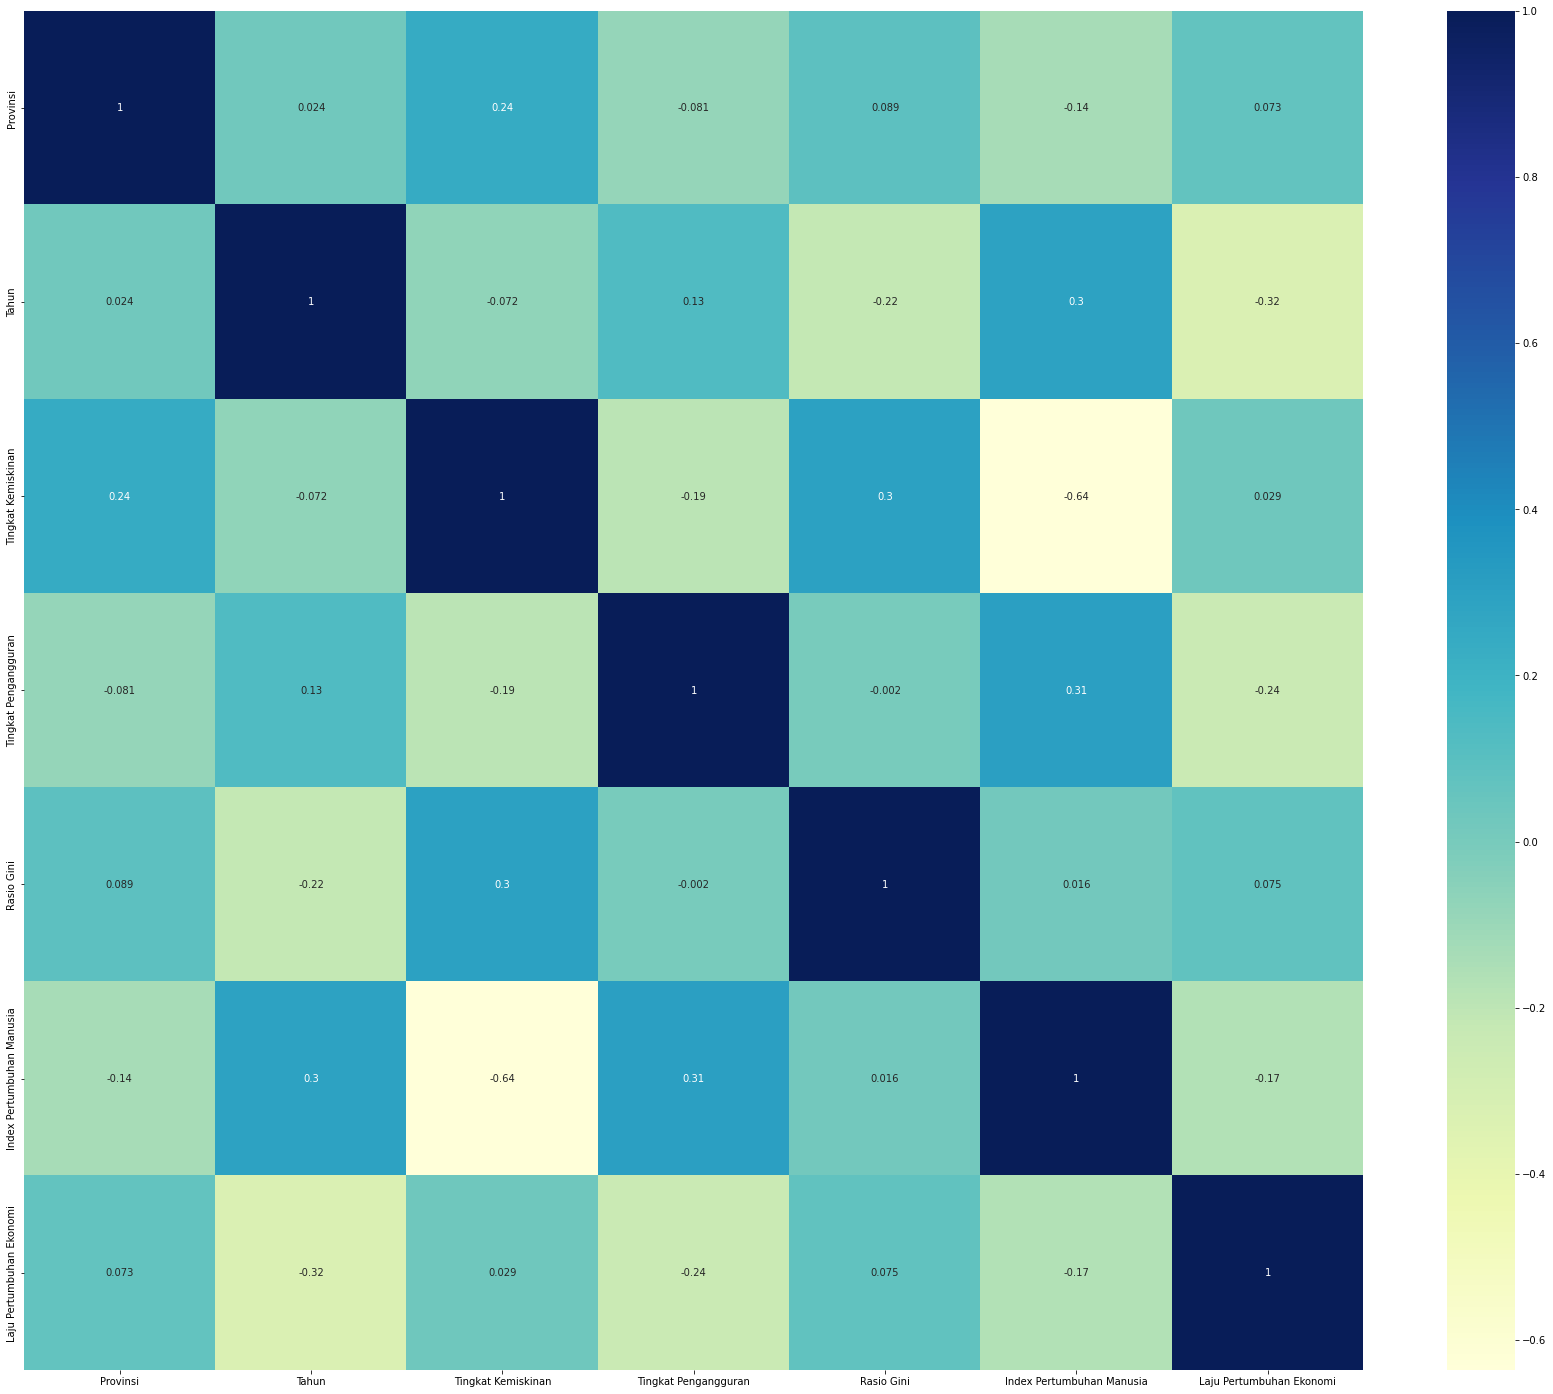

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
y_train = df_train.pop('Laju Pertumbuhan Ekonomi')
X_train = df_train

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Provinsi', False, 4),
 ('Tahun', True, 1),
 ('Tingkat Kemiskinan', False, 2),
 ('Tingkat Pengangguran', True, 1),
 ('Rasio Gini', False, 3),
 ('Index Pertumbuhan Manusia', True, 1)]

In [ ]:
X_train.columns[rfe.support_]

Index(['Tahun', 'Tingkat Pengangguran', 'Index Pertumbuhan Manusia'], dtype='object')

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Tahun,Tingkat Pengangguran,Index Pertumbuhan Manusia
159,0.500,0.521695,0.546661
250,0.875,0.653885,0.628319
241,0.875,0.637740,0.662108
29,0.000,0.203835,0.212389
292,1.000,0.457114,0.603379


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

                               OLS Regression Results                               
Dep. Variable:     Laju Pertumbuhan Ekonomi   R-squared:                       0.146
Model:                                  OLS   Adj. R-squared:                  0.134
Method:                       Least Squares   F-statistic:                     11.96
Date:                      Thu, 22 Dec 2022   Prob (F-statistic):           2.91e-07
Time:                              12:02:04   Log-Likelihood:                -556.41
No. Observations:                       214   AIC:                             1121.
Df Residuals:                           210   BIC:                             1134.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,14.05
3,Index Pertumbuhan Manusia,1.19
2,Tingkat Pengangguran,1.11
1,Tahun,1.10


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

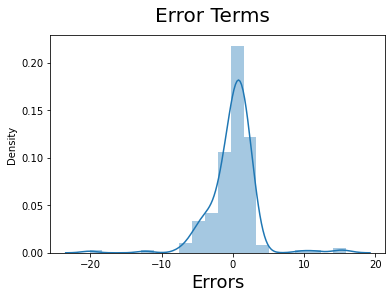

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [ ]:
#Scaling the test set
num_vars =  ['Provinsi','Tahun','Tingkat Kemiskinan','Tingkat Pengangguran'	,'Rasio Gini',	'Index Pertumbuhan Manusia',  'Laju Pertumbuhan Ekonomi']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('Laju Pertumbuhan Ekonomi')
X_test = df_test

In [ ]:

X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_pred = lm.predict(X_test_new)

In [ ]:
X_test_new

,const,Tahun,Tingkat Pengangguran,Index Pertumbuhan Manusia
88,1.0,0.250,0.162915,0.435424
217,1.0,0.750,0.167203,0.964022
78,1.0,0.250,0.722401,0.917897
134,1.0,0.375,0.440514,0.143911
132,1.0,0.375,0.574491,0.392528
...,...,...,...,...
31,1.0,0.000,0.415863,0.262454
171,1.0,0.625,0.421222,0.557657
252,1.0,0.875,0.452304,0.582103
52,1.0,0.125,0.037513,0.146218


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1659.4846337196393

In [ ]:
print(lm.summary())

                               OLS Regression Results                               
Dep. Variable:     Laju Pertumbuhan Ekonomi   R-squared:                       0.146
Model:                                  OLS   Adj. R-squared:                  0.134
Method:                       Least Squares   F-statistic:                     11.96
Date:                      Thu, 22 Dec 2022   Prob (F-statistic):           2.91e-07
Time:                              12:02:04   Log-Likelihood:                -556.41
No. Observations:                       214   AIC:                             1121.
Df Residuals:                           210   BIC:                             1134.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

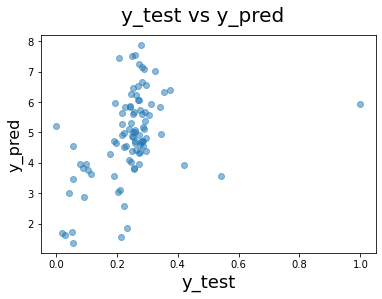

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
x = 1
a = 2023
b = 7.58
c = 74.35



df_pred = pd.DataFrame(data = {"const": [x],"Tahun": [a], "Tingkat Pengangguran" : [b],"Index Pertumbuhan Manusia": [c]})

scaler = MinMaxScaler()
num_vars = ['Tahun','Tingkat Pengangguran','Index Pertumbuhan Manusia']
df_pred[num_vars] = scaler.fit_transform(df_pred[num_vars])





In [ ]:
df_pred = scaler.fit_transform(df_pred)
df_pred

array([[0., 0., 0., 0.]])

In [ ]:
lm.predict(df_pred)

array([0.])

In [ ]:
data

,Provinsi,Tahun,Tingkat Kemiskinan,Tingkat Pengangguran,Rasio Gini,Index Pertumbuhan Manusia,Laju Pertumbuhan Ekonomi
0,Aceh,2013,17.60,8.34,0.331,68.30,3.04
1,Sumatera Utara,2013,10.06,6.09,0.328,68.36,5.67
2,Sumatera Barat,2013,8.14,6.39,0.351,68.91,7.02
3,Riau,2013,7.72,4.19,0.393,69.91,1.05
4,Jambi,2013,8.07,2.89,0.327,67.76,6.39
...,...,...,...,...,...,...,...
301,Sulawesi Barat,2021,11.85,3.13,0.366,66.36,2.56
302,Maluku,2021,16.30,6.93,0.316,69.71,3.04
303,Maluku Utara,2021,6.38,4.71,0.278,68.76,16.40
304,Papua Barat,2021,21.82,5.84,0.374,65.26,-0.51


In [ ]:
data_fix = data
x = data.values.reshape(-1,1)




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
Prov = str(input("Provinsi : "))
Tahun = input("Tahun : ")


#tp
df = data[data.Provinsi == Prov]
tp = df[["Tahun","Tingkat Pengangguran"]]
x1 = tp["Tahun"].values.reshape(-1,1)
y1 = tp["Tingkat Pengangguran"].values.reshape(-1,1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.75, random_state = 0)
regressor1 = LinearRegression()
regressor1.fit(x_train1, y_train1)
y_pred1 = regressor1.predict(x_test1)
hasil_prediksi1=regressor1.predict([[Tahun]]);

#rg
rg=df[["Tahun","Rasio Gini"]]
rg
x2 = rg["Tahun"].values.reshape(-1,1)
y2 = rg["Rasio Gini"].values.reshape(-1,1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size = 0.75, random_state = 0)
regressor2 = LinearRegression()
regressor2.fit(x_train2, y_train2)
y_pred2 = regressor2.predict(x_test2)
hasil_prediksi2=regressor2.predict([[Tahun]]);


#ipm
ipm=df[["Tahun","Index Pertumbuhan Manusia"]]
x3 = ipm["Tahun"].values.reshape(-1,1)
y3 = ipm["Index Pertumbuhan Manusia"].values.reshape(-1,1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3, test_size = 0.75, random_state = 0)
regressor3 = LinearRegression()
regressor3.fit(x_train3, y_train3)
y_pred2 = regressor3.predict(x_test3)
hasil_prediksi3=regressor3.predict([[Tahun]]);


print("Nilai Prediksi pada Tahun",Tahun,"di Provinsi",Prov,"adalah :")
print("Tingkat Pengangguran : ",hasil_prediksi1)
print("Rasio Gini : ",hasil_prediksi2)
print("ipm : ",hasil_prediksi3)
print("/n/n/n/n/")




Provinsi : Jawa Timur
Tahun : 2050
Nilai Prediksi pada Tahun 2050 di Provinsi Jawa Timur adalah :
Tingkat Pengangguran :  [[3.526]]
Rasio Gini :  [[0.3902]]
ipm :  [[91.378]]
/n/n/n/n/


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array

In [ ]:
df

,Provinsi,Tahun,Tingkat Kemiskinan,Tingkat Pengangguran,Rasio Gini,Index Pertumbuhan Manusia,Laju Pertumbuhan Ekonomi
